## Import Libraries

In [68]:
# Importing Libraries 

from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Drew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Drew\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Drew\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

In [69]:
myfile=open('20th_century_Events_Wiki.txt',encoding='utf-8')

In [70]:
# Importing text file of twentieth-century data scraped 

with open ('20th_century_Events_Wiki.txt','r',errors='ignore') as file:
    data=file.read().replace('\n','')

# Remove unnecessary characters (like numbers and symbols)
data_cleaned = re.sub(r'\d+\.\d+|\W+', ' ', data)

In [144]:
# Sentence Tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent=sent_tokenize(data_cleaned)

In [142]:
# Word Tokenization of 20th Century Text File

from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(data_cleaned)
print(tokenized_word[:50])

['Key', 'events', 'of', 'the', '20th', 'century', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchDonateAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', 'Top', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle']


In [73]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words=FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4744 samples and 17229 outcomes>


In [74]:
# Finding the 10 most common words

dist_words.most_common(10)

[('the', 1097),
 ('of', 603),
 ('and', 398),
 ('to', 326),
 ('The', 311),
 ('in', 291),
 ('2018', 243),
 ('December', 222),
 ('Retrieved', 205),
 ('a', 187)]

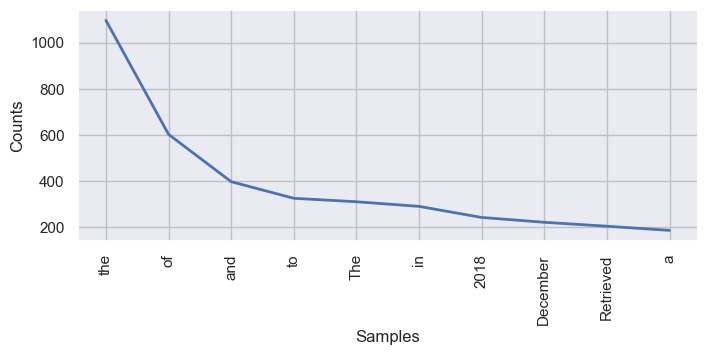

In [75]:
# Creating frequency distribution plot of the 10 most common words

plt.figure(figsize=(8,3))
dist_words.plot(10,cumulative=False)
plt.show()

## Stopwords

In [76]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'won', 'more', 'than', 'very', 'while', 'such', 'couldn', 'can', 'have', 'does', 'until', 'at', 'but', 'will', 'now', 'did', 'nor', 'into', 'm', 'then', 'hasn', 'most', 'is', "should've", 'your', 'o', 'he', 's', 'had', 'theirs', 'as', 'other', 'by', 'there', "wouldn't", 'own', 'on', 'them', 'both', 'themselves', 'having', 'each', 'all', 'him', 'which', 'just', 'here', 'should', 'myself', 'don', 'after', 'up', 'no', 'd', 'didn', 'between', 'again', 'same', 'who', "wasn't", 'or', 'because', 'ours', "doesn't", 're', 'i', "aren't", "you're", 'and', 'below', 'himself', 'whom', 'll', 'itself', 'isn', 'the', 'her', 'where', 'weren', 'if', "weren't", 'shouldn', 'a', 'some', 'needn', 'am', 'any', "it's", 'me', 'under', 't', 'what', 'this', 'off', 'was', 'you', 'during', 'to', 'ma', 'of', "you'd", 'its', 'hadn', 'my', 'before', "she's", 'from', 'that', "didn't", 'it', 'our', 'has', 'how', 'only', 'been', 'with', 'few', 'yourselves', 'those', 'are', "isn't", 'do', 'so', 'why', "hadn't", 'be', 'i

In [77]:
# Removing stopwords in words

filtered_words=[]
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [78]:
filtered_words[:20]

['Key',
 'events',
 '20th',
 'century',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent']

In [79]:
# Creating new FreqDist for filtered_words

dist_words_filter=FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4637 samples and 12488 outcomes>


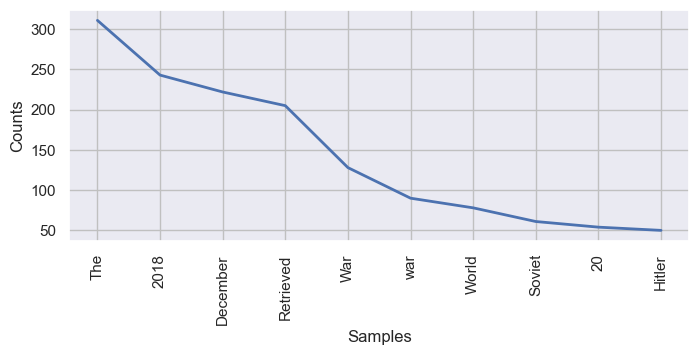

In [80]:
# Plotting new frequency distribution plot

plt.figure(figsize=(8,3))
dist_words_filter.plot(10,cumulative=False)
plt.show()

In [81]:
dist_words_filter

FreqDist({'The': 311, '2018': 243, 'December': 222, 'Retrieved': 205, 'War': 128, 'war': 90, 'World': 78, 'Soviet': 61, '20': 54, 'Hitler': 50, ...})

In [82]:
# Substitute punctuation marks with a space

sans_punc=re.sub("[^a-zA-Z]",
                 " ",
                 str(filtered_words))

In [83]:
sans_punc[:1000]

'  Key    events      th    century    WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchDonateAppearanceCreate    accountLog    inPersonal    tools    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide    Top     Historic    events      th    centuryToggle    Historic    events      th    century    subsection    World    beginning    century         The    war    end    wars    World    War    I                      Russian    Revolution    communism    Between    wars     Economic    depression     The    rise    dictatorship    Global    war    World    War    II                      The    war    Europe     Blitzkrieg     Operation    Barbarossa     Turning    tides     Operation    Overlord     Final   

In [84]:
# Word tokenization of substituted filtered words

tokenized_word_2=word_tokenize(sans_punc)
print(tokenized_word_2[:100])

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchDonateAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Background', 'Japanese

In [85]:
# Creating FreqDist of tokenized words after sans_punc

dist_words_filter_2=FreqDist(tokenized_word_2)
dist_words_filter_2

FreqDist({'The': 320, 'December': 222, 'Retrieved': 205, 'War': 129, 'war': 91, 'th': 86, 'World': 78, 'Soviet': 61, 'Hitler': 50, 'Germany': 43, ...})

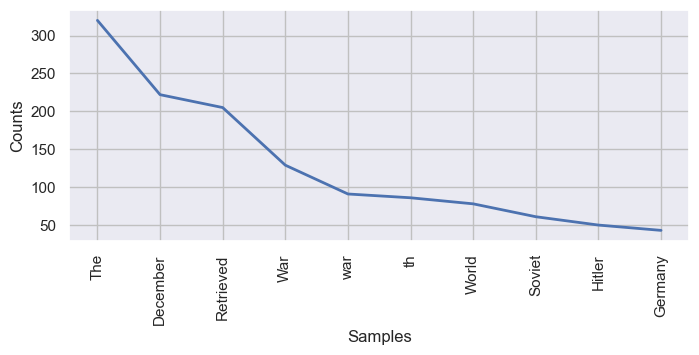

In [86]:
# plotting frequency distribution of dist_words_filter_2 from tokenized words sans_punc
# running for top 10 words to compare to original top 10 words performed earlier above

plt.figure(figsize=(8,3))
dist_words_filter_2.plot(10,cumulative=False)
plt.show()

In [87]:
dist_words_filter_2.most_common(10)

[('The', 320),
 ('December', 222),
 ('Retrieved', 205),
 ('War', 129),
 ('war', 91),
 ('th', 86),
 ('World', 78),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 43)]

### Plot Comments of Before and After Stopwords
    Before Stopwords Removal:
    The graph mostly displayed common words such as "the," "of," "and," and "to". While these words are frequently used in language, they offer little meaning to the analysis of the text content. Other results "2018," "December," and "Retrieved" did not offer any more significance in understanding the text's content either and did not show to be of analysis benefits. The graph appears to have been mostly noise that prevented the key topics of the text to be seen.

    After filerting out stopwords:
    The graph begins to see more noteable words of worth to the text content. The graph now is showing words relevant to key topics of the text to help provide more clarity of noteable 20th century events. With the removal, the graph begins to show words like "Hitler", World" & "War" (World War), "Soviet", and "Decemeber" taking some of the top 10 spots on the graph. This now shows the events to be of noteable war events and can now begin to see that the text may be of a sad part of history and is a text of objective facts.

## POS Tags with TextBlob

In [88]:
# New stopwords 

new_stopwords=["The","s","th","S","ISBN","www","edit","p"]

In [89]:
filtered=[]
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [90]:
%%time
text=TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 8 ms


In [91]:
text[:1000]

TextBlob("['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchDonateAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'centuryToggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'Allied', 'offensive

In [92]:
tags_list=text.tags

In [93]:
tags_list[:20]

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP')]

In [94]:
# Creating dataframe of tag_list

df_text=pd.DataFrame(tags_list)
df_text.columns=["Words","Word Type"]

In [95]:
df_text.head()

,Words,Word Type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [96]:
# Grouping word types by their POS count through groupby function

df_t=df_text.groupby("Word Type").count().reset_index()

In [97]:
df_t.head()

,Word Type,Words
0,CC,1
1,CD,75
2,DT,12
3,EX,12
4,FW,43


In [98]:
# Setting to just see the top 10 POS results

top10_pos=df_t.nlargest(10,"Words")

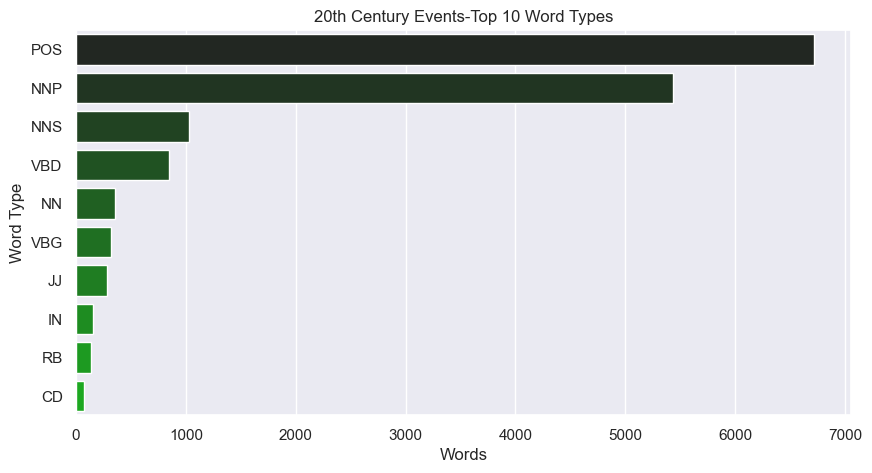

In [99]:
# Plotting bar graph of top 10 POS 

plt.figure(figsize=(10,5))
with sns.dark_palette("xkcd:green",10):
    sns.barplot(x="Words",y="Word Type",
    saturation=0.9,data=top10_pos).set_title("20th Century Events-Top 10 Word Types")

### POS Nouns Occurrence

In [100]:
# Creating dataset based on top 15 POS word types of nouns

df_nouns = df_text[df_text["Word Type"].isin(["NN", "NNS", "NNP", "NNPS"])]
df_nouns.columns = ["Words", "Occurences"]
x = df_nouns.groupby("Words").count().reset_index()
y = x.sort_values(by=["Occurences"], ascending=False)
top15_nouns = y.nlargest(15, "Occurences")

In [101]:
top15_nouns

,Words,Occurences
285,'December,222
1243,'War,129
2579,'war,91
1293,'World,78
1095,'Soviet,61
530,'Hitler,50
529,'History,41
1773,'first,38
565,'In,38
2605,'world,37


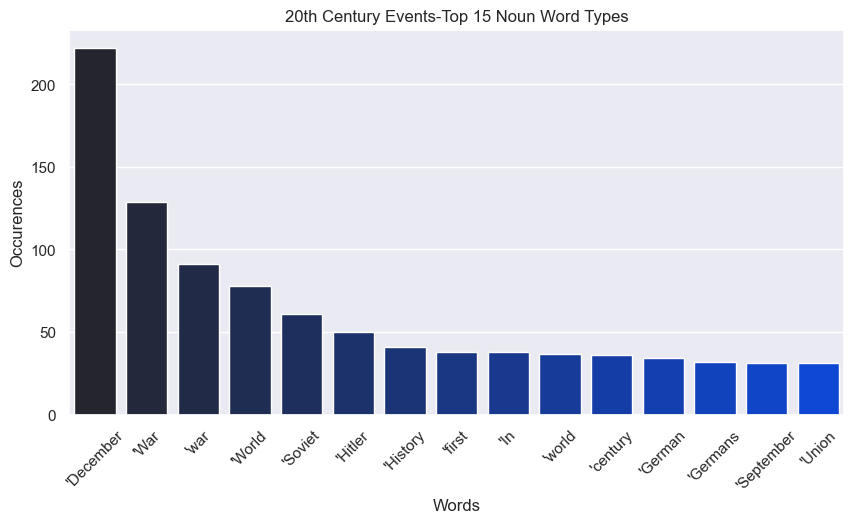

In [102]:
# Plotting bar graph of top 15 POS Nouns

plt.figure(figsize=(10,5))
with sns.dark_palette("xkcd:blue",15):
    sns.barplot(x="Words",y="Occurences",
    saturation=0.9,data=top15_nouns).set_title("20th Century Events-Top 15 Noun Word Types")
plt.xticks(rotation=45)
plt.show()

#### Comments Noun Word Types
    The graph indicates "December" as being the most commonly occurring noun with over 200 occurrences. After "Decemeber", nouns like "War", "World", "Soviet", and "Hitler" show to be prominently occurring and give light to noteable events of the 20th century like World War II and key figures during that event. Thanks to these factors appearing as prominently as they do, it helps to emphasize the text's global and historical nature. The graph, overall, indicates the text's focus on historical global conflicts, mostly World War II.

### POS Verbs Occurrence

In [103]:
# Creating dataset based on top 15 POS word types of verbs

df_verbs = df_text[df_text["Word Type"].isin(["VBD", "VBG", "VBZ", "VBN", "VBP", "VB"])]
df_verbs.columns = ["Words", "Occurences"]
x = df_verbs.groupby("Words").count().reset_index()
y = x.sort_values(by=["Occurences"], ascending=False)
top15_verbs = y.nlargest(15, "Occurences")

In [104]:
top15_verbs

,Words,Occurences
57,'Retrieved,205
78,'United,30
70,'States,26
0,'Allied,19
350,'led,15
549,'used,13
346,'launched,12
1,'Archived,10
313,'including,10
173,'controlled,9


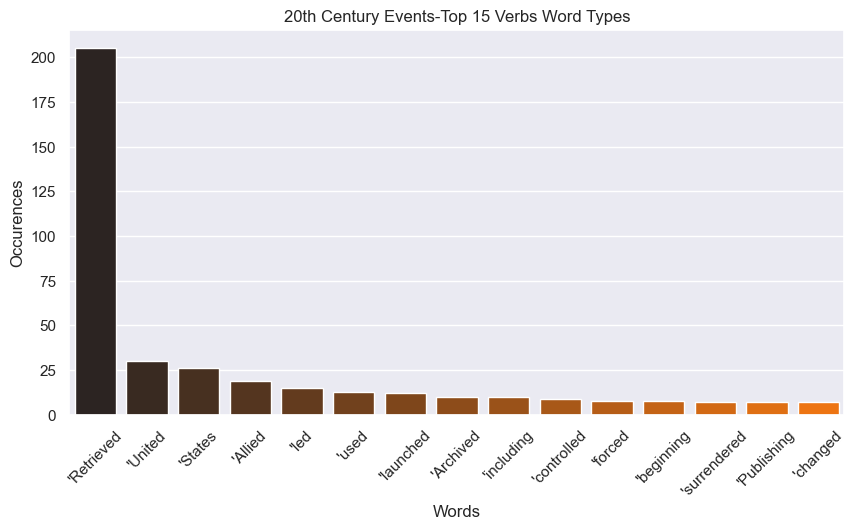

In [105]:
# Plotting bar graph of top 15 POS Verbs

plt.figure(figsize=(10,5))
with sns.dark_palette("xkcd:orange",15):
    sns.barplot(x="Words",y="Occurences",
    saturation=0.9,data=top15_verbs).set_title("20th Century Events-Top 15 Verbs Word Types")
plt.xticks(rotation=45)
plt.show()

#### Comments Verb Word Types
    The verb graph shows that "Retrieved" stands out to dominate over other verb words. Other noteable words, like "launched", "led", "surrendered", "controlled", and "forced", provide insight to the text's aggressive and war focused background of events. The verbs continue to follow the prior noun graph in that the text data showcases a major focus on global conflict events with the use of such action oriented words to describe war time activities. Another thing I noticed due to the result of the tokenization and word tagging done by python is that some words might have been misconstruted with words like "United" and "States" or "allied". While there are certain to be cases in the text that these words were used as action oriented words, I believe that the system when separating these words labeled words like "United States" and "Allied" for the Allied forces as verbs instead of nouns. 

### POS Adjective Occurrence

In [106]:
# Creating dataset based on top 15 POS word types of adjectives

df_adj = df_text[df_text["Word Type"].isin(["JJ", "JJS", "JJR"])]
df_adj.columns = ["Words", "Occurences"]
x = df_adj.groupby("Words").count().reset_index()
y = x.sort_values(by=["Occurences"], ascending=False)
top15_adj = y.nlargest(15, "Occurences")

In [107]:
top15_adj

,Words,Occurences
35,'Japanese,36
2,'American,24
5,'Atlantic,13
70,'West,10
26,'Guardian,10
129,'power,9
110,'largest,8
33,'Interest,7
19,'Chinese,7
53,'Russian,6


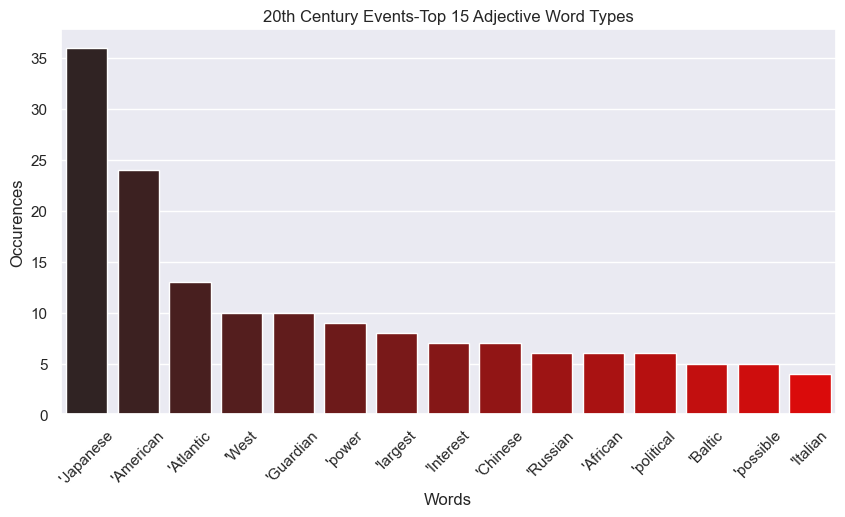

In [108]:
# Plotting bar graph of top 15 POS adjectives

plt.figure(figsize=(10,5))
with sns.dark_palette("xkcd:red",15):
    sns.barplot(x="Words",y="Occurences",
    saturation=0.9,data=top15_adj).set_title("20th Century Events-Top 15 Adjective Word Types")
plt.xticks(rotation=45)
plt.show()

#### Comments Adjective Word Types
    In the adjective graph, it can be seen that "Japanese" and "American" are the most frequently occurring, which shows the significant roles these two nations played during events in the 20th century. After that, it can be seen words like "Atlantic" and "West" appear rather frequently and show at geographic locations during the 20th century events. Further down the graph, words like "Chinese", "Russian", "African",and "politcal" which can show again the global nature of the text and its events based on the diverse groups. The graph highlights nations and location attributes to describe the major players and locations invovled in the events of the 20th century. 

## Country Occurences

In [109]:
# Replace multi-word country names with single tokens
listToStr = ' '.join([str(elem) for elem in filtered])
listToStr = listToStr.replace("United States", "United_States").replace("United Kingdom", "United_Kingdom")

print(listToStr[:1000])

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchDonateAppearanceCreate accountLog inPersonal tools Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events centuryToggle Historic events century subsection World beginning century war end wars World War I Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsKey events

In [110]:
# Count word occurrences in tokenized text
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [111]:
list(all_counts.items())[:25]

[('Key', 2),
 ('events', 9),
 ('century', 36),
 ('WikipediaJump', 1),
 ('contentMain', 1),
 ('menuMain', 1),
 ('menumove', 1),
 ('sidebarhide', 3),
 ('Navigation', 1),
 ('Main', 18),
 ('pageContentsCurrent', 1),
 ('eventsRandom', 1),
 ('articleAbout', 1),
 ('WikipediaContact', 1),
 ('us', 2),
 ('Contribute', 1),
 ('HelpLearn', 1),
 ('editCommunity', 1),
 ('portalRecent', 1),
 ('changesUpload', 2),
 ('fileSearchSearchDonateAppearanceCreate', 1),
 ('accountLog', 1),
 ('inPersonal', 1),
 ('tools', 1),
 ('Create', 1)]

In [112]:
# Replace tokens back to original names for matching with the CSV

all_counts_clean = {key.replace('United_States', 'United States').replace('United_Kingdom', 'United Kingdom'): value 
                    for key, value in all_counts.items()}

In [113]:
# Verify the cleaned counts

print(all_counts_clean.get('United States', 0))
print(all_counts_clean.get('United Kingdom', 0))

23
2


In [114]:
# Creating country dictionary list

countries=pd.read_csv(r"C:\Users\Drew\20th_century\countries_list_20th_century_1.5.csv",index_col=0)

In [115]:
countries.head(500)
pd.set_option('display.max_rows', None)

In [116]:
countries[:50]

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola
6,Antigua and Barbuda
7,Argentina
8,Armenia
9,Australia
10,Austria


In [117]:
# Replace names with aliases

countries['country_name'] = countries['country_name'].replace("  China, People's Republic of ","China")

In [118]:
country_list = countries['country_name'].to_list()

In [119]:
country_list[:25]

[' Afghanistan ',
 '  Albania ',
 '  Algeria ',
 '  Andorra ',
 '  Angola ',
 '  Antigua and Barbuda ',
 '  Argentina ',
 '  Armenia ',
 '  Australia ',
 '  Austria ',
 '  Azerbaijan',
 ' Bahamas, The ',
 '  Bahrain ',
 '  Bangladesh ',
 '  Barbados ',
 '  Belarus ',
 '  Belgium ',
 '  Belize ',
 '  Benin ',
 '  Bhutan ',
 '  Bolivia ',
 '  Bosnia and Herzegovina ',
 '  Botswana ',
 '  Brazil ',
 '  Brunei ']

In [120]:
# Strip any leading or trailing spaces from the 'country_name' column
countries['country'] = countries['country_name'].apply(lambda x: x.strip())

In [121]:
countries.head()

,country_name,country
1,Afghanistan,Afghanistan
2,Albania,Albania
3,Algeria,Algeria
4,Andorra,Andorra
5,Angola,Angola


In [122]:
country_list=countries['country'].to_list()

In [123]:
country_list[:25]

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei']

In [124]:
dict_of_counts = {country: all_counts_clean.get(country, 0) for country in country_list}

In [125]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 'China': 10,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 'Eswatini': 0,
 'Ethi

In [126]:
dct = {v:[k] for v,k in dict_of_counts.items()}  
df_country_count = pd.DataFrame(dct).T

In [127]:
df_country_count = df_country_count.reset_index(drop=False)
df_country_count.columns = ["Country", "Times Referenced"]


In [128]:
df_country_count.head()

,Country,Times Referenced
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1


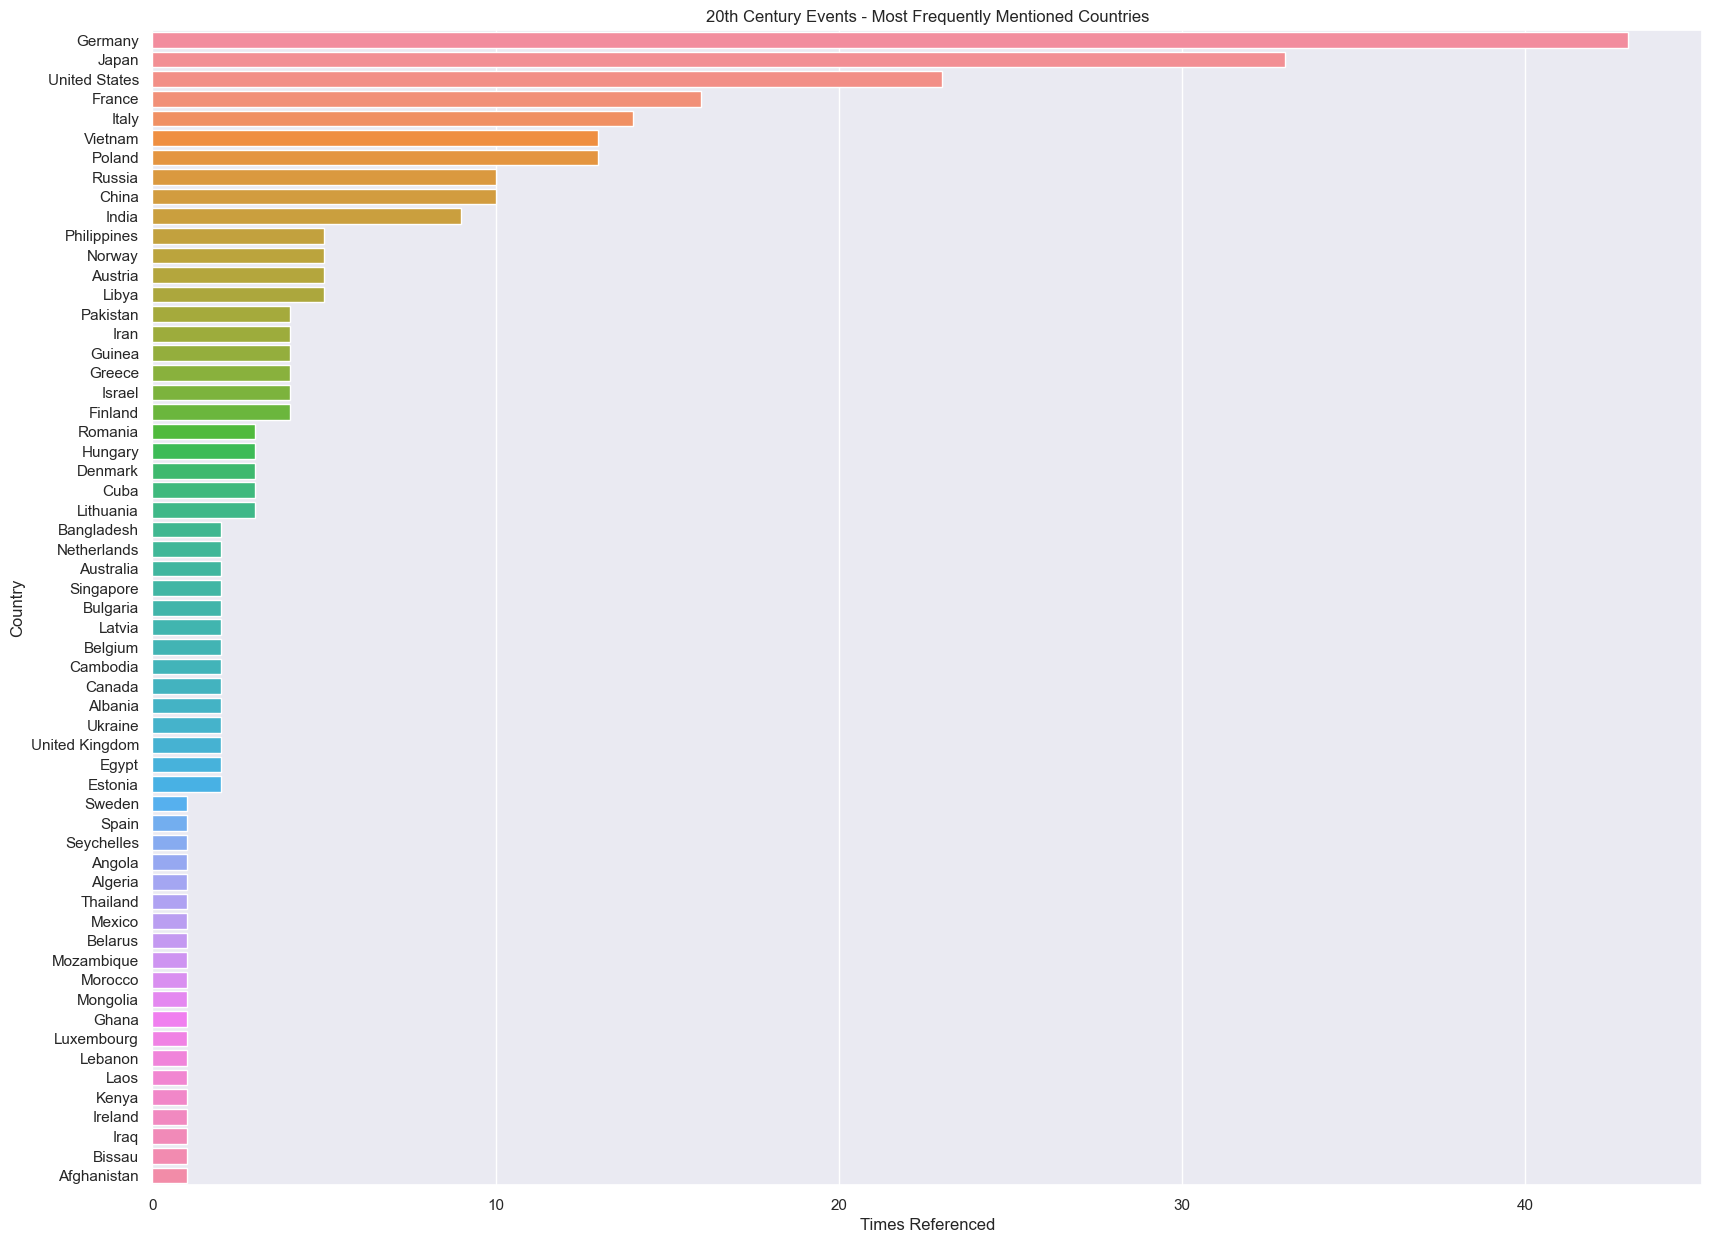

In [129]:
# Filter the DataFrame to only include countries with "Times Referenced" greater than 0
df_filtered = df_country_count[df_country_count["Times Referenced"] > 0]

# Plot the filtered data of countries mentioned more than 0 times
plt.figure(figsize=(20, 15))
with sns.dark_palette("#79C", 27):
    sns.barplot(x="Times Referenced", y="Country",
                saturation=0.9, data=df_filtered.sort_values("Times Referenced", ascending=False)).set_title("20th Century Events - Most Frequently Mentioned Countries")

#### Country Occurrence Findings
    The above graph shows the number of occurrances for those countries with references in the text, while any other country not referenced has been filtered out. Therefore, any country not in the graph has a number of 0. This approach allows the data to highlight those notable players during the 20th century events.
    The graph shows that Germany, Japan, and the United States are the top three countries with references and can be noticed as the major players during the events of the 20th century. The graph also shows other noteable references to be France, Poland, Vietnam, Italy, Russia, and China who are also players in notable historical events around these times like World Wars, Cold War, and the Vietnam War.  

## Sentiment Analysis-Bonus Task

### Sentiment Test Expectation
    Based on my analysis of the text, I expect the sentiment analysis to yield a negatively, objective tone. This believed due to the frequent results of war-related terms and notable historical figures during the text analysis. In the word frequency graphs, words like Hitler, Germans, Soviet, and World War (easily seen from World & War despite being separated) appeared frequently, signifying 20th-century conflicts. The occurrence of words like surrendered, controlled, American, Japanese, Russia, and Vietnam further emphasize wartime events of the period, referencing World War II, the Cold War, and the Vietnam War. Based on the dominant tone of warlike words, I expect the sentiment analysis test to yield a factual, negative result because of the war focused events and conflicts throughout the 20th century.

In [134]:
# Sentiment Analysis 

text_sent=TextBlob(str(filtered))
print(text_sent.sentiment)

Sentiment(polarity=0.04874583324114833, subjectivity=0.35416801894868283)


In [131]:
sentiment_df=pd.DataFrame({'Score':['Polarity','Subjectivity'],
                           'Value':[text_sent.sentiment.polarity,text_sent.sentiment.subjectivity]})

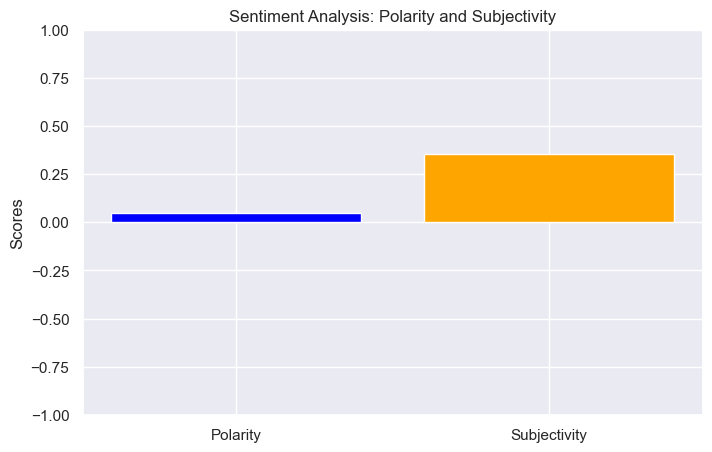

In [132]:
# Creating Bar Plot of sentiment scores

plt.figure(figsize=(8,5))
plt.bar(sentiment_df['Score'],sentiment_df['Value'],color=['blue','orange'])
plt.title('Sentiment Analysis: Polarity and Subjectivity')
plt.ylabel('Scores')
plt.ylim(-1,1) # Scores for polarity range from -1 to 1, and subjectivity ranges from 0 to 1
plt.show()

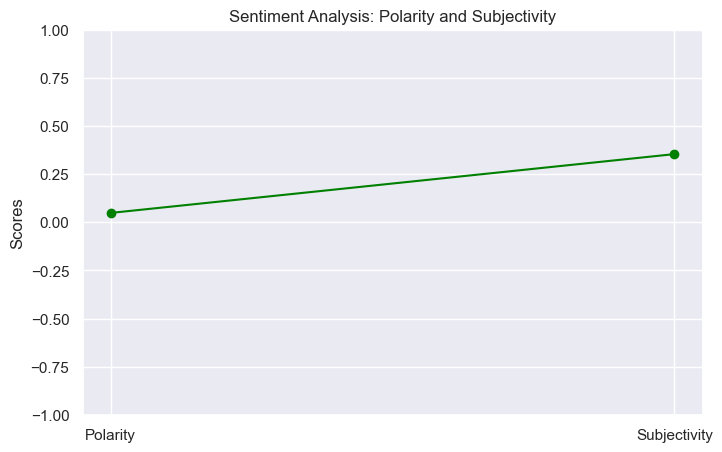

In [133]:
# Creating line plot for sentiment scores

plt.figure(figsize=(8,5))
plt.plot(sentiment_df['Score'],sentiment_df['Value'],marker='o',color='green')
plt.title('Sentiment Analysis: Polarity and Subjectivity')
plt.ylabel('Scores')
plt.ylim(-1,1) # Scores for polarity range from -1 to 1, and subjectivity ranges from 0 to 1
plt.show()

### Sentiment Test Result: 
      Based on the sentiment test results, the analysis yielded a sentiment polarity of 0.487 and a subjectivity score of 0.354. This suggests that the text does indeed lean more towards a factual nature, which aligns with the historical content of the text and my expectations of the text analysis. Since the text primarily provides historical information, it makes sense for it to appear more objective. However, I was surprised to see the overall tone being more neutral over negative, especially considering the frequent occurrence of war-related terms in the frequency graphs. Despite the focus on war and the devasting effects it can cause, the sentiment of the text remains appears to of a neutral tone in the portrayal of these 20th century events.